In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
import scipy

In [130]:
restaurants = pd.read_csv("restaurants_catg.csv")
crime = pd.read_csv('crime.csv')

In [131]:
X = restaurants[['latitude', 'longitude']]
Y = crime[['latitude', 'longitude']]

In [132]:
data_filter = restaurants[restaurants.index.isin(np.random.randint(1000, size=200))]
X_filter = data_filter[['latitude', 'longitude']]

In [201]:
X_filter = X_filter[['latitude', 'longitude']]

In [202]:
k = 20
model = cluster.KMeans(n_clusters=k, init='k-means++')
df = X_filter.copy()
df['cluster'] = model.fit_predict(X_filter)
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,
                     df.drop("cluster", axis=1).values)
df['centroids'] = 0
for i in closest:
    df['centroids'].iloc[i] = 1
data_filter[['cluster', 'centroids']] = df[['cluster', 'centroids']]

C:\Users\Tekhne\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tekhne\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


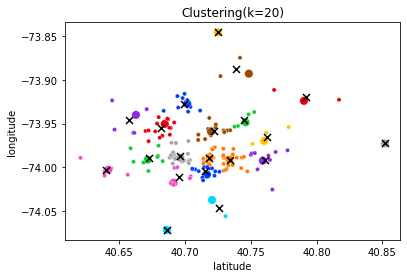

In [204]:
## choosing part of data points for plotting
fig, ax = plt.subplots()
sns.scatterplot(x="latitude", y="longitude", data=data_filter,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                ax=ax).set_title('Clustering(k='+str(k)+')')
# plt.legend(loc='upper center', bbox_transform=fig.transFigure, ncol=25)
ax.get_legend().remove()
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', marker="x")
plt.savefig("Kmeans Clusters for Restaurants.png", bbox_inches = "tight")

Affinity Propagation

In [135]:
import matplotlib.colors as mcolors

In [194]:
data_filter = restaurants[restaurants.index.isin(np.random.randint(1000, size=200))]
X_filter = data_filter[['latitude', 'longitude']]

In [195]:
model = cluster.AffinityPropagation(random_state=0)
df = X_filter.copy()
df['cluster'] = model.fit_predict(X_filter)
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,
                     df.drop("cluster", axis=1).values)
df['centroids'] = 0
for i in closest:
    df['centroids'].iloc[i] = 1
X_filter[['cluster', 'centroids']] = df[['cluster', 'centroids']]

C:\Users\Tekhne\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tekhne\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


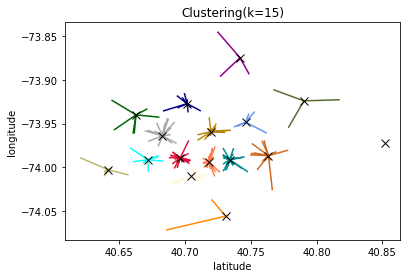

In [197]:
plt.close("all")
plt.figure(1)
plt.clf()
n = df["cluster"].nunique()
colors = list(mcolors.CSS4_COLORS)[15:]
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    th_centroids = model.cluster_centers_
    #plt.plot(X_filter[class_members]['latitude'],X_filter[class_members]['longitude'], color=col, marker='.')
    for i in range(len(X_filter[class_members])):
        plt.plot([th_centroids[k,0], X_filter[class_members].iloc[i]['latitude']], [th_centroids[k,1], X_filter[class_members].iloc[i]['longitude']], col)
    plt.plot(
        th_centroids[k,0],
        th_centroids[k,1],
        "x",
        markerfacecolor='k',
        markeredgecolor='k',
        markersize=8,
    )
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Clustering(k='+str(k)+')')
plt.savefig("AP Clusters Diagram.png", bbox_inches = "tight")

In [163]:
list(mcolors.CSS4_COLORS)[10:]

['beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 'lightgreen',
 'lightgrey',
 'lightpink',
 'lightsalmon',
 'light

ValueError: The palette list has the wrong number of colors.

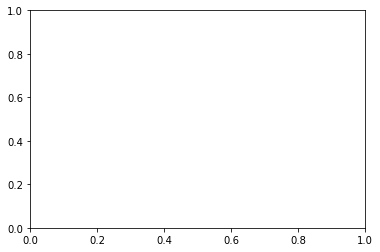

In [146]:
k = df["cluster"].nunique()
fig, ax = plt.subplots()
sns.scatterplot(x="latitude", y="longitude", data=data_filter,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')
ax.get_legend().remove()
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', marker="x")
plt.savefig("AP Clusters for Restaurants.png", bbox_inches = "tight")

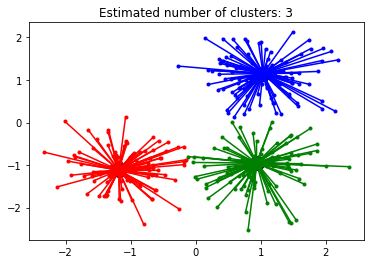

In [107]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [67]:
class_members

array([False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,

In [34]:
X[class_members, 0]

array([-1.17671587, -0.92174673, -1.27143074, -1.15450648, -0.85682816,
       -1.00784106, -1.09532675, -1.7914692 , -1.19972451, -1.10345184,
       -1.47222313, -1.84905291, -0.65423062, -0.71073925, -1.77039851,
       -0.97525251, -1.18234677, -2.01534223, -1.4779725 , -0.18479345,
       -1.06644029, -0.73946756, -0.65077143, -1.34602492, -0.98068472,
       -1.0308132 , -1.35980219, -0.65311342, -1.65326343, -1.34391881,
       -1.3261468 , -2.12778211, -0.73805449, -0.8600377 , -0.4657453 ,
       -1.00851021, -0.86274182, -0.53407581, -0.66680846, -0.67834277,
       -1.34200545, -0.95113752, -1.07883351, -1.66712924, -0.75312911,
       -0.92902342, -1.57867763, -1.05908202, -1.49275537, -0.14431002,
       -1.31871851, -0.18208691, -1.13386677, -1.59442963, -1.32620429,
       -1.14591868, -0.60683602, -1.71203045, -1.1924399 , -2.32958612,
       -0.17593253, -0.25275773, -0.26671064, -1.06685078, -1.22046132,
       -0.61337351, -1.06797485, -1.29865803, -1.35235014, -1.40